# Data Understanding

(This document relates to question number 2)

- What pedagogical strategies developed by teachers seem to promote better reading performance (PISA 2018 - teacher context data)?
- What pedagogical strategies, according to the students' perspective, seem to promote better reading performance (PISA 2018 - student context data)?
- Do teachers and students have the same perceptions?

## **2.1 Collect Initial Data**

For this question we're using 2 datasets (https://www.oecd.org/en/data/datasets/pisa-2022-database.html):
- Students database 2018 (PISA)
- Teachers database 2018 (PISA)

The source datasets are in .sas7bdat format, that we converted to .csv with the following command:

In [49]:
"""
data = pd.read_sas(
    "../../../databases/2018/cy07_msu_stu_qqq.sas7bdat", format="sas7bdat"
)

data.to_csv("../../../databases/2018/student2018.csv", index=False)

data = pd.read_sas(
    "../../../databases/2018/cy07_msu_tch_qqq.sas7bdat", format="sas7bdat"
)

data.to_csv("../../../databases/2018/teacher2018.csv", index=False)
"""

'\ndata = pd.read_sas(\n    "../../../databases/2018/cy07_msu_stu_qqq.sas7bdat", format="sas7bdat"\n)\n\ndata.to_csv("../../../databases/2018/student2018.csv", index=False)\n\ndata = pd.read_sas(\n    "../../../databases/2018/cy07_msu_tch_qqq.sas7bdat", format="sas7bdat"\n)\n\ndata.to_csv("../../../databases/2018/teacher2018.csv", index=False)\n'

In [50]:
import pandas as pd

#student = pd.read_csv('../../../databases/2018/student2018.csv', nrows=1000)
student = pd.read_csv('../../../databases/2018/student2018.csv')

In [51]:
#teacher = pd.read_csv('../../../databases/2018/teacher2018.csv', nrows=1000)
#teacher = pd.read_csv('../../../databases/2018/teacher2018.csv')

**Note:** We don't include these files in the project folder, so it's necessary to manually download and put them in their respective folder.

## **2.2 Describe Data**

#### Student Data

The original dataset has 1119 features

In [52]:
student.head()

,CNTRYID,CNT,CNTSCHID,CNTSTUID,CYC,NatCen,STRATUM,SUBNATIO,OECD,ADMINMODE,...,PV4RTML,PV5RTML,PV6RTML,PV7RTML,PV8RTML,PV9RTML,PV10RTML,SENWT,VER_DAT,i
0,8.0,b'ALB',800115.0,800001.0,b'07MS',b'000800',b'ALB0107',b'0080000',0.0,2.0,...,325.281,370.041,358.524,345.833,380.064,357.376,385.496,0.48064,b' 09MAY19:11:20:53',31.0
1,8.0,b'ALB',800300.0,800002.0,b'07MS',b'000800',b'ALB0105',b'0080000',0.0,2.0,...,337.259,294.530,325.444,367.058,333.356,367.616,334.448,1.30666,b' 09MAY19:11:20:54',31.0
2,8.0,b'ALB',800088.0,800003.0,b'07MS',b'000800',b'ALB0101',b'0080000',0.0,2.0,...,297.929,269.282,293.719,314.027,295.519,283.143,315.992,0.67391,b' 09MAY19:11:20:54',31.0
3,8.0,b'ALB',800014.0,800004.0,b'07MS',b'000800',b'ALB0109',b'0080000',0.0,2.0,...,349.369,333.416,320.410,388.597,324.419,372.543,355.213,0.68250,b' 09MAY19:11:20:53',31.0
4,8.0,b'ALB',800294.0,800005.0,b'07MS',b'000800',b'ALB0203',b'0080000',0.0,2.0,...,461.508,464.534,461.681,455.574,430.815,476.752,482.148,0.63579,b' 09MAY19:11:20:53',31.0


In [53]:
student.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 612004 entries, 0 to 612003
Data columns (total 1119 columns):
 #     Column        Non-Null Count   Dtype  
---    ------        --------------   -----  
 0     CNTRYID       612004 non-null  float64
 1     CNT           612004 non-null  object 
 2     CNTSCHID      612004 non-null  float64
 3     CNTSTUID      612004 non-null  float64
 4     CYC           612004 non-null  object 
 5     NatCen        612004 non-null  object 
 6     STRATUM       612004 non-null  object 
 7     SUBNATIO      612004 non-null  object 
 8     OECD          612004 non-null  float64
 9     ADMINMODE     612004 non-null  float64
 10    LANGTEST_QQQ  606279 non-null  float64
 11    LANGTEST_COG  612004 non-null  float64
 12    LANGTEST_PAQ  93706 non-null   float64
 13    BOOKID        612004 non-null  float64
 14    ST001D01T     612004 non-null  float64
 15    ST003D02T     600687 non-null  float64
 16    ST003D03T     612004 non-null  float64
 17    ST004D

Decode keys

In [54]:
import sys
import os

# Add the src directory to the Python path
sys.path.append(os.path.abspath('../../../src')) # Add the src directory to the Python path

from pisadatamap.pisadatamap import PISADataMap

data_map = PISADataMap('../../../databases/2018/student_data_structure_2018.csv')

for column in data_map.map_enum:
    print(f"\033[1m{column.name}\033[0m: {column.value}")

C:\Users\david\Documents\iscte\2 semestre\[PIAA] Projeto de Inteligência Artificial Aplicada\piaa\src\pisadatamap\pisadatamap.py:28: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  self.map_enum = Enum('MapEnum', {row[0]: row[1] for index, row in map_df.iterrows()}) # Setup enum with key, values of the codebook


CNTRYID: Country Identifier
CNT: Country code 3-character
CNTSCHID: Intl. School ID
CNTSTUID: Intl. Student ID
CYC: PISA Assessment Cycle (2 digits + 2 character Assessment type - MS/FT)
NatCen: National Centre 6-digit Code
STRATUM: Stratum ID 7-character (cnt + region ID + original stratum ID)
SUBNATIO: Adjudicated sub-region code 7-digit code (3-digit country code + region ID + stratum ID)
OECD: OECD country
ADMINMODE: Mode of Respondent
LANGTEST_QQQ: Language of Questionnaire
LANGTEST_COG: Language of Assessment
LANGTEST_PAQ: Language of Assessment (PAQ)
BOOKID: Form Identifier
ST001D01T: Student International Grade (Derived)
ST003D02T: Student (Standardized) Birth - Month
ST003D03T: Student (Standardized) Birth -Year
ST004D01T: Student (Standardized) Gender
ST005Q01TA: What is the <highest level of schooling> completed by your mother?
ST006Q01TA: Does your mother have this qualification? <ISCED level 6> (incl. higher qualifications at level 5A in some countries)
ST006Q02TA: Does yo

The dataset is composed by 1103 numeric columns and only 16 categorical columns.


In [55]:
import pandas as pd
from tabulate import tabulate

categorical_columns = student.select_dtypes(include=["object", "category"]).columns
numeric_columns = student.select_dtypes(include=["int64", "float64"]).columns

column_types_df = pd.DataFrame(
    {
        "Column type": ["Numeric", "Categorical"],
        "Number of columns": [len(numeric_columns), len(categorical_columns) ],
        "Column names": [
            ", ".join(numeric_columns),
            ", ".join(categorical_columns),
        ],
    }
)

print(
    tabulate(
        column_types_df,
        headers="keys",
        tablefmt="pretty",
        showindex=False,
        colalign=("left", "left", "left"),
    )
)

+-------------+-------------------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [56]:
student.describe()

,CNTRYID,CNTSCHID,CNTSTUID,OECD,ADMINMODE,LANGTEST_QQQ,LANGTEST_COG,LANGTEST_PAQ,BOOKID,ST001D01T,...,PV3RTML,PV4RTML,PV5RTML,PV6RTML,PV7RTML,PV8RTML,PV9RTML,PV10RTML,SENWT,i
count,612004.000000,6.120040e+05,6.120040e+05,612004.000000,612004.000000,606279.000000,612004.000000,93706.000000,612004.000000,612004.000000,...,551930.000000,551930.000000,551930.000000,551930.000000,551930.000000,551930.000000,551930.000000,551930.000000,612004.000000,612004.0
mean,448.931030,4.489354e+07,4.490023e+07,0.481250,1.901841,321.202902,321.948267,232.529038,18.410911,11.077864,...,463.374699,463.264302,463.306010,463.149250,463.407820,463.471132,463.374083,463.430908,0.653590,31.0
std,269.865482,2.698691e+07,2.698768e+07,0.499649,0.297530,158.577368,161.453416,79.332138,15.087501,11.046151,...,110.411792,110.462719,110.462172,110.187115,110.504983,110.332022,110.391826,110.300336,0.414764,0.0
min,8.000000,8.000020e+05,8.000010e+05,0.000000,1.000000,113.000000,113.000000,130.000000,1.000000,7.000000,...,0.000000,56.015000,36.265000,17.996000,12.169000,34.006000,47.619000,53.210000,0.004780,31.0
25%,203.000000,2.030021e+07,2.030481e+07,0.000000,2.000000,156.000000,156.000000,156.000000,8.000000,9.000000,...,383.013000,382.848000,382.725000,382.813000,383.006000,383.065250,383.097000,383.171000,0.339500,31.0
50%,422.000000,4.220031e+07,4.220616e+07,0.000000,2.000000,313.000000,313.000000,232.000000,15.000000,10.000000,...,463.234500,463.248000,463.160500,463.063000,463.472000,463.546000,463.314500,463.338000,0.705490,31.0
75%,703.000000,7.030015e+07,7.030307e+07,1.000000,2.000000,451.000000,449.000000,301.000000,23.000000,10.000000,...,543.046750,542.986500,543.007000,542.831000,543.247000,543.111500,543.198750,543.046000,0.857630,31.0
max,983.000000,9.830081e+07,9.832912e+07,1.000000,2.000000,998.000000,998.000000,495.000000,99.000000,98.000000,...,878.282000,897.773000,911.648000,920.917000,935.439000,891.032000,884.818000,940.246000,9.168930,31.0


In [57]:
print(f"Total number of students: {len(student)}\n" )

not_repeating_students = student[student["REPEAT"] == 0]
print(f"Total number of non repeating students: {len(student[student["REPEAT"] == 0])}")
student_grades = student[student["REPEAT"] == 0]["ST001D01T"].value_counts().reset_index()
student_grades.columns = ["Grade", "Count"]
print(student_grades)
print("\n")

print(f"Total number of repeating students: {len(student[student["REPEAT"] == 1])}")
repeating_students_grades = student[student["REPEAT"] == 1]["ST001D01T"].value_counts().reset_index()
repeating_students_grades.columns = ["Grade", "Repeating"]
print(repeating_students_grades)

Total number of students: 612004

Total number of non repeating students: 507325
   Grade   Count
0   10.0  297398
1    9.0  146618
2   11.0   43232
3    8.0    7995
4   98.0    5771
5   12.0    2987
6   96.0    2552
7    7.0     763
8   13.0       9


Total number of repeating students: 68147
   Grade  Repeating
0    9.0      37642
1    8.0      13690
2   10.0      10940
3    7.0       3429
4   11.0       1259
5   98.0        889
6   96.0        242
7   12.0         56


## 2.3 Explore data

The question to explore:
 - What pedagogical strategies, according to the students' perspective, seem to promote better reading performance (PISA 2018 - student context data)?

The target variable in this analysis is the reading scores achieved by each student.

This score is calculated as the average of the values across all "Possible Reading Value" columns, which are represented in the dataset as PV1READ to PV10READ. These features are plausible values, each representing multiple estimates of the student's performance. Averaging them provides a more reliable and comprehensive measure of the student's grade.


In [58]:
"""
Setup average reading scores
"""

from columns_list_q2 import (
    reading_columns,
    get_avg_results,
    drop_columns
)

student = get_avg_results(student, reading_columns, "Reading", None)

In [59]:
student = drop_columns(student)

In [60]:
student["Avg Reading Result"].describe()

count    606627.000000
mean        456.109543
std         105.147426
min          70.284000
25%         379.464950
50%         456.091500
75%         532.671700
max         823.398500
Name: Avg Reading Result, dtype: float64

The scores go from 0 top 1000 [citar aqui], we will group scores to analize the diferences between performances

5 (90-100%)
4 (70-89%)
3 (50-69%)
2 (20-49%)
1 (0-19%)

In [61]:

def categorize_reading_score(score):
    score = score/10
    if 90 <= score <= 100:
        return "Very Good (90-100%)"
    elif 70 <= score < 90:
        return "Good (70-89%)"
    elif 50 <= score < 70:
        return "Sufficient (50-69%)"
    elif 20 <= score < 50:
        return "Insufficient (20-49%)"
    else:
        return "Not Satisfy (0-19%)"

student['Reading Score Category'] = student['Avg Reading Result'].apply(categorize_reading_score)

print("Number of stundents by grade category:")
print("Very Good (90-100%): ", len(student[student['Reading Score Category']=="Very Good (90-100%)"]))
print("Good (70-89%): ", len(student[student['Reading Score Category']=="Good (70-89%)"]))
print("Sufficient (50-69%): ", len(student[student['Reading Score Category']=="Sufficient (50-69%)"]))
print("Insufficient (20-49%): ", len(student[student['Reading Score Category']=="Insufficient (20-49%)"]))
print("Not Satisfy (0-19%): ", len(student[student['Reading Score Category']=="Not Satisfy (0-19%)"]))



Number of stundents by grade category:
Very Good (90-100%):  0
Good (70-89%):  3294
Sufficient (50-69%):  209634
Insufficient (20-49%):  392370
Not Satisfy (0-19%):  6706


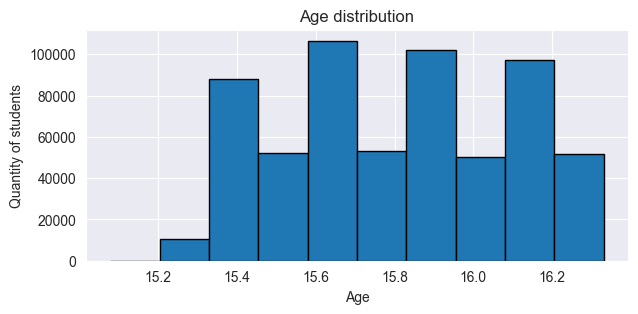

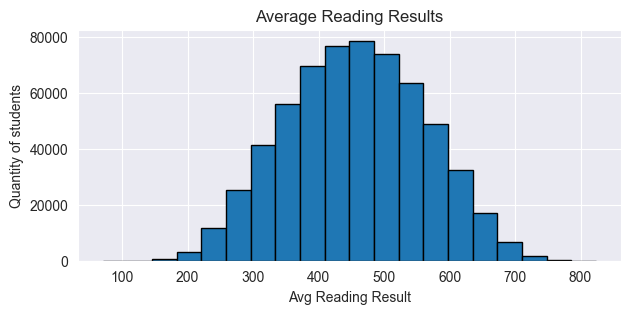

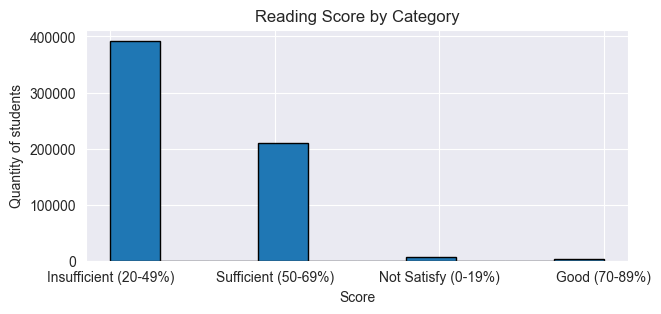

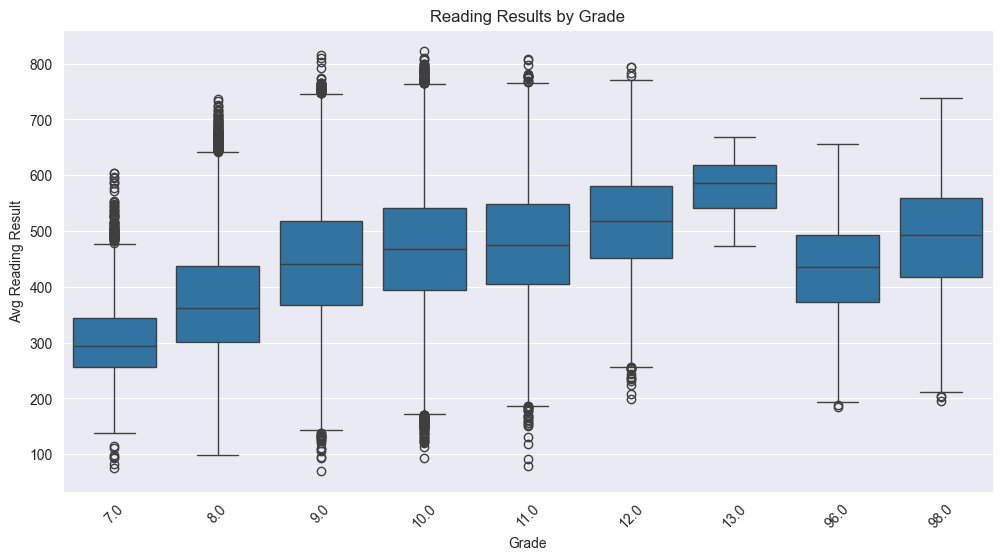

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7, 3))
plt.hist(student["AGE"], bins=10, edgecolor='black')
plt.title("Age distribution")
plt.ylabel("Quantity of students")
plt.xlabel("Age")
plt.show()

plt.figure(figsize=(7, 3))
plt.hist(student["Avg Reading Result"], bins=20, edgecolor='black')
plt.title("Average Reading Results")
plt.ylabel("Quantity of students")
plt.xlabel("Avg Reading Result")
plt.show()

plt.figure(figsize=(7, 3))
plt.hist(student["Reading Score Category"], edgecolor='black')
plt.title("Reading Score by Category")
plt.ylabel("Quantity of students")
plt.xlabel("Score")
plt.show()

# 11. Relação entre Age_Category e Weight_(kg)
plt.figure(figsize=(12, 6))
sns.boxplot(x='ST001D01T', y="Avg Reading Result", data=student)
plt.title("Reading Results by Grade")
plt.xlabel("Grade")
plt.ylabel("Avg Reading Result")
plt.xticks(rotation=45)
plt.show()

If we separate the more advanced grades (11th, 12th and 13th) by country, we can clearly observe that the majority of students are English.

This can be justified because of the way that the english teaching system works. See: https://b28mathstutor.co.uk/how-the-english-school-system-works/#:~:text=Unlike%20in%20some%20countries%2C%20students,1%2C%20also%20known%20as%20Infants

This difference may lead to a disproportionate representation of students and we should consider them as an exception in the next phase.

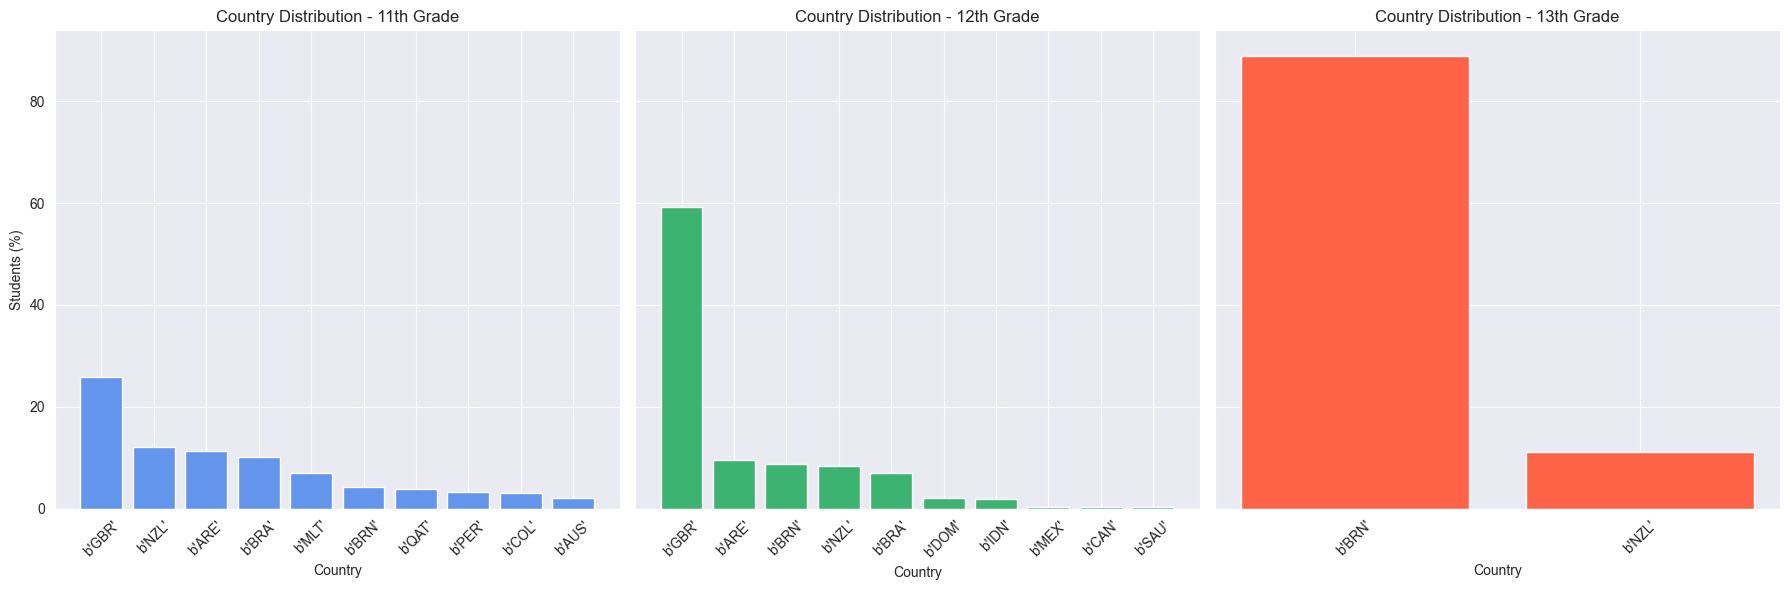

In [63]:
import matplotlib.pyplot as plt

def filter_by_grade(dataframe, grade):
    return dataframe[dataframe["ST001D01T"] == grade]

grade_11 = filter_by_grade(student, 11)
grade_12 = filter_by_grade(student, 12)
grade_13 = filter_by_grade(student, 13)

grade_11_counts = grade_11["CNT"].value_counts(normalize=True).mul(100).head(10)
grade_12_counts = grade_12["CNT"].value_counts(normalize=True).mul(100).head(10)
grade_13_counts = grade_13["CNT"].value_counts(normalize=True).mul(100).head(10)

fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

axes[0].bar(grade_11_counts.index, grade_11_counts.values, color="cornflowerblue")
axes[0].set_title("Country Distribution - 11th Grade")
axes[0].set_xlabel("Country")
axes[0].set_ylabel("Students (%)")
axes[0].tick_params(axis="x", rotation=45)
axes[0].set_ylim(
    0, max(grade_11_counts.max(), grade_12_counts.max(), grade_13_counts.max()) + 5
)

axes[1].bar(grade_12_counts.index, grade_12_counts.values, color="mediumseagreen")
axes[1].set_title("Country Distribution - 12th Grade")
axes[1].set_xlabel("Country")
axes[1].tick_params(axis="x", rotation=45)

axes[2].bar(grade_13_counts.index, grade_13_counts.values, color="tomato")
axes[2].set_title("Country Distribution - 13th Grade")
axes[2].set_xlabel("Country")
axes[2].tick_params(axis="x", rotation=45)

plt.tight_layout()
plt.show()




It is also essential to examine the correlation between all dataset features and the target variable (Avg Reading Result). This helps identify which features are strongly associated with students performance and can be considered in the next step for feature selection.

We computed this correlation, and the top 20 features were visualized in a table.

In [64]:
correl = (
    student.corr(numeric_only=True)["Avg Reading Result"]
    .abs()
    .sort_values(ascending=False)
)

In [65]:
top_corr = correl.drop("Avg Reading Result").head(20)

top_corr_df = top_corr.reset_index()

top_corr_df["Description"] = top_corr_df["index"].map(lambda code: data_map.map_enum[code].value if code in data_map.map_enum.__members__ else "Description not found")

top_corr_df.columns = ["Feature", "Correlation with Reading Result", "Description"]
display(top_corr_df)


,Feature,Correlation with Reading Result,Description
0,METASPAM,0.456116,Meta-cognition: assess credibility
1,PA042Q01TA,0.429466,What is your annual household income?
2,METASUM,0.418597,Meta-cognition: summarising
3,ESCS,0.409361,"Index of economic, social and cultural status"
4,HOMEPOS,0.404923,Home possessions (WLE)
5,PISADIFF,0.404541,Perception of difficulty of the PISA test (WLE)
6,ST013Q01TA,0.392740,How many books are there in your home?
7,ST197Q01HA,0.365021,How informed are you about the following topic...
8,ST163Q03HA,0.362116,"In the PISA test, how do you feel about the re..."
9,EC154Q01IA,0.360050,Do you currently attend additional instruction...


**Correlation of reading by score category**

Check correlations in every Reading score by category

In [74]:

correl = student[student["Reading Score Category"] == "Very Good (90-100%)"].corr(numeric_only=True)["Avg Reading Result"].abs().sort_values(ascending=False)

top_corr = correl.drop("Avg Reading Result").head(20)
top_corr_df = top_corr.reset_index()
top_corr_df["Description"] = top_corr_df["index"].map(lambda code: data_map.map_enum[code].value if code in data_map.map_enum.__members__ else "Description not found")
top_corr_df.columns = ["Feature", "Correlation with Reading Result", "Description"]
display(top_corr_df)

#plt.figure(figsize=(14,14))
#sns.heatmap(corr);

CNTRYID        NaN
CNTSCHID       NaN
CNTSTUID       NaN
OECD           NaN
ADMINMODE      NaN
LANGTEST_QQQ   NaN
LANGTEST_COG   NaN
LANGTEST_PAQ   NaN
BOOKID         NaN
ST001D01T      NaN
ST003D02T      NaN
ST003D03T      NaN
ST004D01T      NaN
ST005Q01TA     NaN
ST006Q01TA     NaN
ST006Q02TA     NaN
ST006Q03TA     NaN
ST006Q04TA     NaN
ST007Q01TA     NaN
ST008Q01TA     NaN
Name: Avg Reading Result, dtype: float64

In [67]:
correl = student[student["Reading Score Category"] == "Good (70-89%)"].corr(numeric_only=True)["Avg Reading Result"].abs().sort_values(ascending=False)
top_corr = correl.drop("Avg Reading Result").head(20)
top_corr_df = top_corr.reset_index()
top_corr_df["Description"] = top_corr_df["index"].map(lambda code: data_map.map_enum[code].value if code in data_map.map_enum.__members__ else "Description not found")
top_corr_df.columns = ["Feature", "Correlation with Reading Result", "Description"]
display(top_corr_df)

,Feature,Correlation with Reading Result,Description
0,PA160Q04HA,0.170671,How often do you read these types of texts bec...
1,WB162Q01HA,0.163216,How easy is it for you to talk to the followin...
2,WB178Q05HA,0.160748,The following questions refer to your day yest...
3,PA159Q01HA,0.159228,About how much time do you usually spend readi...
4,PA154Q06IA,0.150709,When child attended the first year of <ISCED 1...
5,PA006Q08TA,0.148642,Importance for choosing a school: The school h...
6,PA171Q03HA,0.146443,Involved in: I choose certain products for eth...
7,PA158Q03HA,0.137378,Statements about reading? I like talking about...
8,WB166Q03HA,0.136702,How did you feel the last time you attended a ...
9,FL164Q16HA,0.132405,"School lessons in the last 12 months, have you..."


In [68]:
correl = student[student["Reading Score Category"] == "Sufficient (50-69%)"].corr(numeric_only=True)["Avg Reading Result"].abs().sort_values(ascending=False)
top_corr = correl.drop("Avg Reading Result").head(20)
top_corr_df = top_corr.reset_index()
top_corr_df["Description"] = top_corr_df["index"].map(lambda code: data_map.map_enum[code].value if code in data_map.map_enum.__members__ else "Description not found")
top_corr_df.columns = ["Feature", "Correlation with Reading Result", "Description"]
display(top_corr_df)

,Feature,Correlation with Reading Result,Description
0,METASPAM,0.282926,Meta-cognition: assess credibility
1,ST166Q03HA,0.254139,How appropriate in reaction to this email: Cli...
2,ST013Q01TA,0.249801,How many books are there in your home?
3,PISADIFF,0.240885,Perception of difficulty of the PISA test (WLE)
4,ST163Q02HA,0.223576,"In the PISA test, how do you feel about the re..."
5,SCREADCOMP,0.219366,Self-concept of reading: Perception of compete...
6,JOYREAD,0.216160,Joy/Like reading (WLE)
7,ST163Q03HA,0.213033,"In the PISA test, how do you feel about the re..."
8,ESCS,0.211727,"Index of economic, social and cultural status"
9,ST196Q02HA,0.208727,How easy to perform on your own: Explain how c...


In [69]:
correl = student[student["Reading Score Category"] == "Insufficient (20-49%)"].corr(numeric_only=True)["Avg Reading Result"].abs().sort_values(ascending=False)
top_corr = correl.drop("Avg Reading Result").head(20)
top_corr_df = top_corr.reset_index()
top_corr_df["Description"] = top_corr_df["index"].map(lambda code: data_map.map_enum[code].value if code in data_map.map_enum.__members__ else "Description not found")
top_corr_df.columns = ["Feature", "Correlation with Reading Result", "Description"]
display(top_corr_df)

,Feature,Correlation with Reading Result,Description
0,EC154Q01IA,0.324567,Do you currently attend additional instruction...
1,EC154Q05IA,0.294887,Do you currently attend additional instruction...
2,WB173Q03HA,0.281319,How did you feel the last time you spent time ...
3,ST197Q01HA,0.272713,How informed are you about the following topic...
4,HOMEPOS,0.268879,Home possessions (WLE)
5,ST012Q05NA,0.268462,How many in your home: <Cell phones> with Inte...
6,ST207Q03HA,0.267069,Agree: It is a wrong thing to join in bullying.
7,WB171Q03HA,0.265937,Now think of the last time you had a break bet...
8,WB173Q01HA,0.264033,How did you feel the last time you spent time ...
9,IC008Q08TA,0.257716,Use digital devices outside of school: Browsin...


In [70]:
correl = student[student["Reading Score Category"] == "Not Satisfy (0-19%)"].corr(numeric_only=True)["Avg Reading Result"].abs().sort_values(ascending=False)
top_corr = correl.drop("Avg Reading Result").head(20)
top_corr_df = top_corr.reset_index()
top_corr_df["Description"] = top_corr_df["index"].map(lambda code: data_map.map_enum[code].value if code in data_map.map_enum.__members__ else "Description not found")
top_corr_df.columns = ["Feature", "Correlation with Reading Result", "Description"]
display(top_corr_df)

,Feature,Correlation with Reading Result,Description
0,EC162Q07HA,0.306112,Why didn't you study before or after school? I...
1,ADMINMODE,0.296223,Mode of Respondent
2,FL168Q06HA,0.294590,In the last 12 months: Made a payment using a ...
3,HOMESCH,0.273218,Use of ICT outside of school (for school work ...
4,WB032Q01NA,0.264108,"Outside of school, during the past 7 days, on ..."
5,FL164Q17HA,0.261575,"School lessons in the last 12 months, have you..."
6,IC150Q08HA,0.261404,Time spent using digital devices during classr...
7,IC150Q03HA,0.255863,Time spent using digital devices during classr...
8,IC010Q06NA,0.249580,Use digital devices outside of school: Using S...
9,ENTUSE,0.245783,ICT use outside of school (leisure) (WLE)


Due to some categories being NaN, instead of comparing with student score, i'm going to compare by classification (meaning for example the best 10% of students are very good, instead of students with score between 900 and 1000)

In [76]:
def categorize_reading_students_by_performance(df):
    # Sort the DataFrame by 'Avg Reading Result' in descending order
    df = df.sort_values(by='Avg Reading Result', ascending=False).reset_index(drop=True)

    # Calculate the number of students
    total_students = len(df)

    # Define the percentage thresholds
    very_good_threshold = int(total_students * 0.10)
    good_threshold = int(total_students * 0.30)
    sufficient_threshold = int(total_students * 0.60)
    insufficient_threshold = int(total_students * 0.80)

    # Categorize students based on their rank
    df['Reading Score Classification'] = 'Not Satisfy (0-19%)'
    df.loc[:insufficient_threshold-1, 'Reading Score Classification'] = 'Insufficient (20-49%)'
    df.loc[:sufficient_threshold-1, 'Reading Score Classification'] = 'Sufficient (50-69%)'
    df.loc[:good_threshold-1, 'Reading Score Classification'] = 'Good (70-89%)'
    df.loc[:very_good_threshold-1, 'Reading Score Classification'] = 'Very Good (90-100%)'

    return df

student = categorize_reading_students_by_performance(student)

print("Number of stundents by grade category:")
print("Very Good (90-100%): ", len(student[student['Reading Score Classification']=="Very Good (90-100%)"]))
print("Good (70-89%): ", len(student[student['Reading Score Classification']=="Good (70-89%)"]))
print("Sufficient (50-69%): ", len(student[student['Reading Score Classification']=="Sufficient (50-69%)"]))
print("Insufficient (20-49%): ", len(student[student['Reading Score Classification']=="Insufficient (20-49%)"]))
print("Not Satisfy (0-19%): ", len(student[student['Reading Score Classification']=="Not Satisfy (0-19%)"]))


Number of stundents by grade category:
Very Good (90-100%):  61200
Good (70-89%):  122401
Sufficient (50-69%):  183601
Insufficient (20-49%):  122401
Not Satisfy (0-19%):  122401


In [77]:
correl = student[student['Reading Score Classification'] == "Very Good (90-100%)"].corr(numeric_only=True)["Avg Reading Result"].abs().sort_values(ascending=False)

top_corr = correl.drop("Avg Reading Result").head(20)
top_corr_df = top_corr.reset_index()
top_corr_df["Description"] = top_corr_df["index"].map(lambda code: data_map.map_enum[code].value if code in data_map.map_enum.__members__ else "Description not found")
top_corr_df.columns = ["Feature", "Correlation with Reading Result", "Description"]
display(top_corr_df)

,Feature,Correlation with Reading Result,Description
0,JOYREAD,0.177009,Joy/Like reading (WLE)
1,SCREADCOMP,0.172150,Self-concept of reading: Perception of compete...
2,PISADIFF,0.163329,Perception of difficulty of the PISA test (WLE)
3,ST160Q02IA,0.161520,How much do you agree or disagree? Reading is ...
4,ST013Q01TA,0.160655,How many books are there in your home?
5,PA156Q03HA,0.159475,Thinking back to when your child was about 10 ...
6,ST160Q01IA,0.155412,How much do you agree or disagree? I read only...
7,ST161Q03HA,0.152453,Agree: I read fluently.
8,METASPAM,0.150745,Meta-cognition: assess credibility
9,ST161Q01HA,0.149654,Agree: I am a good reader.


In [78]:
correl = student[student['Reading Score Classification'] == "Good (70-89%)"].corr(numeric_only=True)["Avg Reading Result"].abs().sort_values(ascending=False)
top_corr = correl.drop("Avg Reading Result").head(20)
top_corr_df = top_corr.reset_index()
top_corr_df["Description"] = top_corr_df["index"].map(lambda code: data_map.map_enum[code].value if code in data_map.map_enum.__members__ else "Description not found")
top_corr_df.columns = ["Feature", "Correlation with Reading Result", "Description"]
display(top_corr_df)

,Feature,Correlation with Reading Result,Description
0,METASPAM,0.152287,Meta-cognition: assess credibility
1,ST166Q03HA,0.142632,How appropriate in reaction to this email: Cli...
2,ST013Q01TA,0.121789,How many books are there in your home?
3,PISADIFF,0.119444,Perception of difficulty of the PISA test (WLE)
4,ST163Q02HA,0.112882,"In the PISA test, how do you feel about the re..."
5,ST163Q03HA,0.105555,"In the PISA test, how do you feel about the re..."
6,ST196Q02HA,0.105046,How easy to perform on your own: Explain how c...
7,PA042Q01TA,0.104585,What is your annual household income?
8,METASUM,0.103670,Meta-cognition: summarising
9,ESCS,0.101489,"Index of economic, social and cultural status"


In [79]:
correl = student[student['Reading Score Classification'] == "Sufficient (50-69%)"].corr(numeric_only=True)["Avg Reading Result"].abs().sort_values(ascending=False)
top_corr = correl.drop("Avg Reading Result").head(20)
top_corr_df = top_corr.reset_index()
top_corr_df["Description"] = top_corr_df["index"].map(lambda code: data_map.map_enum[code].value if code in data_map.map_enum.__members__ else "Description not found")
top_corr_df.columns = ["Feature", "Correlation with Reading Result", "Description"]
display(top_corr_df)

,Feature,Correlation with Reading Result,Description
0,METASPAM,0.164590,Meta-cognition: assess credibility
1,METASUM,0.140670,Meta-cognition: summarising
2,PA042Q01TA,0.136424,What is your annual household income?
3,ST166Q03HA,0.132648,How appropriate in reaction to this email: Cli...
4,ESCS,0.131025,"Index of economic, social and cultural status"
5,HOMEPOS,0.126951,Home possessions (WLE)
6,PISADIFF,0.126663,Perception of difficulty of the PISA test (WLE)
7,ST013Q01TA,0.119531,How many books are there in your home?
8,ST163Q02HA,0.119298,"In the PISA test, how do you feel about the re..."
9,UNDREM,0.118735,Meta-cognition: understanding and remembering


In [ ]:
correl = student[student['Reading Score Classification'] == "Insufficient (20-49%)"].corr(numeric_only=True)["Avg Reading Result"].abs().sort_values(ascending=False)
top_corr = correl.drop("Avg Reading Result").head(20)
top_corr_df = top_corr.reset_index()
top_corr_df["Description"] = top_corr_df["index"].map(lambda code: data_map.map_enum[code].value if code in data_map.map_enum.__members__ else "Description not found")
top_corr_df.columns = ["Feature", "Correlation with Reading Result", "Description"]
display(top_corr_df)

In [ ]:
correl = student[student['Reading Score Classification'] == "Not Satisfy (0-19%)"].corr(numeric_only=True)["Avg Reading Result"].abs().sort_values(ascending=False)
top_corr = correl.drop("Avg Reading Result").head(20)
top_corr_df = top_corr.reset_index()
top_corr_df["Description"] = top_corr_df["index"].map(lambda code: data_map.map_enum[code].value if code in data_map.map_enum.__members__ else "Description not found")
top_corr_df.columns = ["Feature", "Correlation with Reading Result", "Description"]
display(top_corr_df)

## 2.4 Verify data quality


In [71]:
# Visualização geral de valores ausentes
#missing_summary = pd.DataFrame({
#    'Missing Values': student.isnull().sum(),
#    'Percentage Missing': (student.isnull().mean() * 100).round(2)
#})

# Ordenar pelo número de valores ausentes
#missing_summary = missing_summary[missing_summary['Missing Values'] > 0.7].sort_values(by='Missing Values', ascending=False)

#print("Resumo de valores ausentes:\n")
#print(missing_summary)

# Identificar linhas com valores ausentes
#rows_with_missing = student[student.isnull().any(axis=1)]
#print(f"\nNúmero de linhas com valores ausentes: {len(rows_with_missing)}")

# Exibir um sample de linhas com valores ausentes
#if len(rows_with_missing) > 0:
#    print("\nExemplo de linhas com valores ausentes:")
#    print(rows_with_missing.head())

In [72]:
print("\n--- Missing Values ---")
missing = student.isnull().mean().sort_values(ascending=False)
print(missing[missing > 0.7])


--- Missing Values ---
EC162Q08HA    0.944417
EC162Q06HA    0.941192
EC162Q07HA    0.940992
EC162Q04HA    0.940647
EC162Q05HA    0.940247
                ...   
FL150Q02TA    0.710289
FL150Q01TA    0.708863
FL151Q02HA    0.707794
FL151Q01HA    0.706613
FCFMLRTY      0.705144
Length: 358, dtype: float64
